# Ridge Regression

Ridge Regression is a statistical method used for estimating the coefficients in scenarios where the independent variables are highly correlated. It's an adaptation of the widely used linear regression algorithm and enhances regular linear regression by slightly changing its cost function, which results in less overfit models.

## Uses of Ridge Regression
Ridge regression is particularly useful to mitigate the problem of multicollinearity, which commonly occurs in models with large numbers of parameters. It's used when you have a large number of input variables, suspect that some of the input variables may be irrelevant or redundant, and want to reduce the variance in your model and prevent overfitting. It has been used in many fields including econometrics, chemistry, and engineering.

## Examples of Ridge Regression
Here are some examples of ridge regression in real life:
1. **Analysis of Prostate-Specific Antigen**: Ridge regression can be used for the analysis of prostate-specific antigen and clinical measures among people who were about to have their prostates removed.
2. **Multicollinearity in Multiple Regression Data**: Ridge regression is essentially used for the analysis of multicollinearity in multiple regression data.

As a data scientist, understanding ridge regression is crucial as it provides a strong foundation for understanding more complex machine learning algorithms. It's also a powerful tool in its own right for making predictions based on a set of related data points. It's particularly useful when dealing with multicollinearity in your data, where two or more predictor variables are highly correlated.

# Гребневая регрессия

Гребневая регрессия - это статистический метод, используемый для оценки коэффициентов в сценариях, где независимые переменные сильно коррелированы. Это адаптация широко используемого алгоритма линейной регрессии и улучшает обычную линейную регрессию за счет небольшого изменения ее функции стоимости, что приводит к менее переобученным моделям.

## Применение гребневой регрессии
Гребневая регрессия особенно полезна для смягчения проблемы мультиколлинеарности, которая обычно возникает в моделях с большим количеством параметров. Она используется, когда у вас много входных переменных, вы подозреваете, что некоторые из входных переменных могут быть нерелевантными или избыточными, и вы хотите уменьшить дисперсию в вашей модели и предотвратить переобучение. Она была использована во многих областях, включая эконометрику, химию и инженерию.

## Примеры гребневой регрессии
Вот несколько примеров гребневой регрессии в реальной жизни:
1. **Анализ специфического антигена простаты**: Гребневую регрессию можно использовать для анализа специфического антигена простаты и клинических показателей среди людей, которые собирались удалить простату.
2. **Мультиколлинеарность в данных множественной регрессии**: Гребневая регрессия по существу используется для анализа мультиколлинеарности в данных множественной регрессии.

Для специалиста по данным понимание гребневой регрессии имеет решающее значение, поскольку оно обеспечивает прочную основу для понимания более сложных алгоритмов машинного обучения. Это также мощный инструмент сам по себе для прогнозирования на основе набора связанных точек данных. Он особенно полезен при работе с мультиколлинеарностью в ваших данных, где две или более предикторных переменных сильно коррелированы.

Epoch 0, Loss: 414.0887451171875
Epoch 100, Loss: 49.05339431762695
Epoch 200, Loss: 42.6429328918457
Epoch 300, Loss: 42.52994155883789
Epoch 400, Loss: 42.52794647216797
Epoch 500, Loss: 42.52791213989258
Epoch 600, Loss: 42.52790832519531
Epoch 700, Loss: 42.52790832519531
Epoch 800, Loss: 42.52790832519531
Epoch 900, Loss: 42.52790832519531


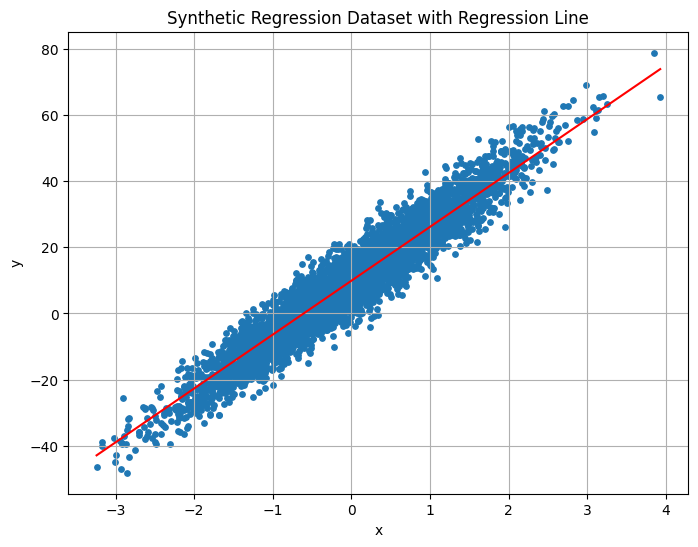

In [2]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np

class RidgeRegressionModel:
    def __init__(self, n_samples=5000, n_features=1, n_targets=1, noise=5, bias=10, alpha=1.0):
        """
        Initialize the RidgeRegressionModel with a synthetic dataset.

        Parameters:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_targets (int): The number of targets.
        noise (float): The standard deviation of the Gaussian noise applied to the output.
        bias (float): The bias term in the underlying linear model.
        alpha (float): Regularization strength; must be a positive float.
        """
        X_numpy, y_numpy, _ = make_regression(
            n_samples=n_samples,
            n_features=n_features,
            n_targets=n_targets,
            noise=noise,
            bias=bias,
            coef=True,
            random_state=42
        )
        self.X = torch.tensor(X_numpy, dtype=torch.float32)
        self.y = torch.tensor(y_numpy, dtype=torch.float32).view(-1, 1)
        self.model = nn.Linear(self.X.shape[1], self.y.shape[1])
        self.criterion = nn.MSELoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.01)
        self.alpha = alpha

    def train(self, epochs=1000):
        """
        Train the model for a number of epochs.

        Parameters:
        epochs (int): The number of epochs to train the model.
        """
        for epoch in range(epochs):
            y_pred = self.model(self.X)
            loss = self.criterion(y_pred, self.y) + self.alpha * torch.norm(self.model.weight)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.item()}')
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

    def plot(self):
        """
        Plot the dataset and the learned regression line.
        """
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X.numpy(), self.y.numpy(), s=15)
        x_vals = np.linspace(self.X.min(), self.X.max(), 100).astype(np.float32)
        y_vals = self.model(torch.tensor(x_vals).view(-1, 1)).detach().numpy()
        plt.plot(x_vals, y_vals, color='red')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Synthetic Regression Dataset with Regression Line')
        plt.grid(True)
        plt.show()

# Usage:
rr = RidgeRegressionModel()
rr.train()
rr.plot()